# Models of Neural Systems - Computer Practical 3
# Author: Robert Tjarko Lange

In [1]:
from __future__ import division
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, arange

# Question 1: Analytial solutions to ODEs

* a. Specific solution for $x_0 = 1$: $x(t) = e^{-t}$

* b. Specific solution for $x_0 = 1$: $x(t) = \sqrt{2 t +1}$

* c. Specific solution for $x_0 = 0$: $x(t) = 1 - e^{-t}$

* d. Specific solution for $x_0 = \frac{1}{2}$: $x(t) = \frac{0.5 e^t}{0.5 e^t + 0.5}$

In [2]:
# Define functions for analytical solutions
def x_a(t, x_0): return np.exp(-t)

def x_b(t, x_0): return np.sqrt(2*t + 1)

def x_c(t, x_0): return 1 - np.exp(-t)

def x_d(t, x_0): return x_0*np.exp(t)/(x_0*np.exp(t) + (1 - x_0))

# Define functions for differential equations
def f_a(x, t): return -x

def f_b(x, t): return 1./x

def f_c(x, t): return 1 - x

def f_d(x, t): return x*(1-x)

# Question 2: Numerical solutions to ODEs

In [3]:
def euler(f_func, x_0, t_max, dt):
    """
    Inputs: differential equation, initial condition, max time evolution, time resolution 
    Output: time sequences, euler approximated function
    """
    x_t = [x_0]
    t_seq = np.arange(dt, t_max, dt)
    for t in t_seq:
        x_t.append(x_t[-1] + f_func(x_t[-1], t)*dt)
    
    t_seq = np.insert(t_seq, 0, 0)
    return t_seq, np.array(x_t)


def calc_euler_rk_ana(f_func, x_ana, x_0, t_max, dt):
    """
    Inputs: differential and analytical eq, initial cond, max time evolution, time resolution 
    Output: time seq, euler approx fct, runge-kutta approx fct, analytical fct eval for seq
    """
    t_seq, x_t_euler = euler(f_func, x_0, t_max, dt)
    x_t_rk = integrate.odeint(f_func, x_0, t_seq)
    x_t_ana = x_ana(t_seq, x_0)
    return t_seq, x_t_euler, x_t_rk, x_t_ana


def calc_approx_error(x_ana, f_func, x_0, t_max, delta_t):
    """
    Inputs: analytical eq, ode, initial condition, max time evolution, time resolution 
    Output: time sequences, squared-euler/runge-kutta approximation error
    """
    euler_err = []
    rk_err = []
    t_seqs = []
    
    for dt in delta_t:
        t_seq, x_t_euler = euler(f_func, x_0, t_max, dt)
        
        x_t_rk = integrate.odeint(f_func, x_0, t_seq).ravel()
        x_t_ana = x_ana(t_seq, x_0)
        
        t_seqs.append(t_seq)
        
        err_euler_temp = (x_t_euler - x_t_ana)**2
        err_rk_temp = (x_t_rk - x_t_ana)**2
        
        euler_err.append(err_euler_temp)
        rk_err.append(err_rk_temp)

    return t_seqs, euler_err, rk_err

In [4]:
# Define subtitles for later plotting
titles_col_1 = [r"(a) $\dot{x} = -x; x_0 = 1$", r"(b) $\dot{x} = x^{-1}; x_0 = 1$",
                r"(c) $\dot{x} = 1 - x; x_0 = 0$", r"(d) $\dot{x} = x(1 - x); x_0 = 1/2$"]
titles_col_2 = [r"(a) Euler Approx. Error: $(x^{ana} - x^{euler})^2$", r"(b) Euler Approx. Error: $(x^{ana} - x^{euler})^2$",
                r"(c) Euler Approx. Error: $(x^{ana} - x^{euler})^2$", r"(d) Euler Approx. Error: $(x^{ana} - x^{euler})^2$"]
titles_col_3 = [r"(a) Runge-Kutta Approx. Error: $(x^{ana} - x^{rk})^2$", r"(b) Runge-Kutta Approx. Error: $(x^{ana} - x^{rk})^2$",
                r"(c) Runge-Kutta Approx. Error: $(x^{ana} - x^{rk})^2$", r"(d) Runge-Kutta Approx. Error: $(x^{ana} - x^{rk})^2$"]
dt_titles = [r"$dt = 0.1$", r"$dt = 0.33$", r"$dt = 0.66$", r"$dt = 1$"]

In [5]:
# Define initial conditions, max time evolution and time resolution for four functions
x_0_a, t_max_a, dt_a = 1, 5, .1
x_0_b, t_max_b, dt_b = 1, 5, .1
x_0_c, t_max_c, dt_c = 0, 5, .1
x_0_d, t_max_d, dt_d = 1./2, 5, .1

# Compute everything
t_seq_a, x_t_a_euler, x_t_a_rk, x_t_a_ana = calc_euler_rk_ana(f_a, x_a, x_0_a, t_max_a, dt_a)
t_seq_b, x_t_b_euler, x_t_b_rk, x_t_b_ana = calc_euler_rk_ana(f_b, x_b, x_0_b, t_max_b, dt_b)
t_seq_c, x_t_c_euler, x_t_c_rk, x_t_c_ana = calc_euler_rk_ana(f_c, x_c, x_0_c, t_max_c, dt_c)
t_seq_d, x_t_d_euler, x_t_d_rk, x_t_d_ana = calc_euler_rk_ana(f_d, x_d, x_0_d, t_max_d, dt_d)

# Sort for later plotting
t_seq = [t_seq_a, t_seq_b, t_seq_c, t_seq_d]
x_t_euler = [x_t_a_euler, x_t_b_euler, x_t_c_euler, x_t_d_euler]
x_t_rk = [x_t_a_rk, x_t_b_rk, x_t_c_rk, x_t_d_rk]
x_t_ana = [x_t_a_ana, x_t_b_ana, x_t_c_ana, x_t_d_ana]

# Compute approximation errors for different approx resolutions
delta_t = [.1, .33, 0.66, 1]
t_seqs_a, euler_err_a, rk_err_a = calc_approx_error(x_a, f_a, x_0_a, t_max_a, delta_t)
t_seqs_b, euler_err_b, rk_err_b = calc_approx_error(x_b, f_b, x_0_b, t_max_b, delta_t)
t_seqs_c, euler_err_c, rk_err_c = calc_approx_error(x_c, f_c, x_0_c, t_max_c, delta_t)
t_seqs_d, euler_err_d, rk_err_d = calc_approx_error(x_d, f_d, x_0_d, t_max_d, delta_t)

# Sort for later plotting
t_seqs_err = [t_seqs_a, t_seqs_b, t_seqs_c, t_seqs_d]
euler_err = [euler_err_a, euler_err_b, euler_err_c, euler_err_d]
rk_err = [rk_err_a, rk_err_b, rk_err_c, rk_err_d]

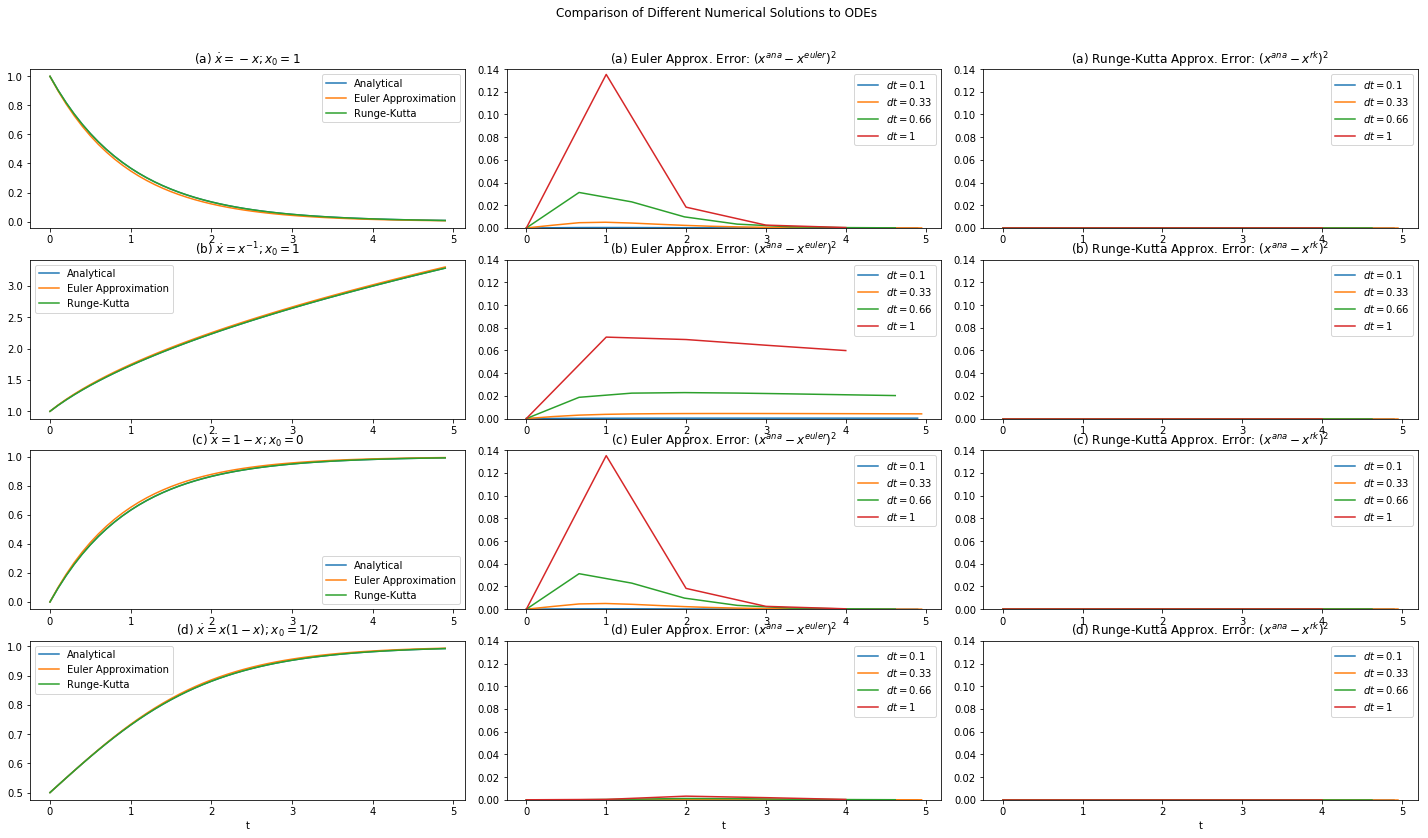

In [6]:
# Plot the results
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))
fig.suptitle('Comparison of Different Numerical Solutions to ODEs'.format(type), fontsize=12)
fig.tight_layout(rect=[0, 0.03, 1, 0.925])

for i in range(4):
    ax[i, 0].plot(t_seq[i], x_t_ana[i], label="Analytical")
    ax[i, 0].plot(t_seq[i], x_t_euler[i], label="Euler Approximation")
    ax[i, 0].plot(t_seq[i], x_t_rk[i], label="Runge-Kutta")
    
    for j in range(len(t_seqs_err)):
        ax[i, 1].plot(t_seqs_err[i][j], euler_err[i][j], label=dt_titles[j])
        ax[i, 2].plot(t_seqs_err[i][j], rk_err[i][j], label=dt_titles[j])
        # Enforce same y-axis for approx err comparison
        ax[i, 1].set_ylim(bottom=0, top=0.14)
        ax[i, 2].set_ylim(bottom=0, top=0.14)
    
    ax[i, 0].set_title(titles_col_1[i])
    ax[i, 1].set_title(titles_col_2[i])
    ax[i, 2].set_title(titles_col_3[i])
    
    ax[i, 0].legend()
    ax[i, 1].legend()
    ax[i, 2].legend()
    
    if i==3:
        for j in range(3):
            ax[i, j].set_xlabel("t")

The Runge-Kutta method is a more accurate approximation of the four ODEs. This is due to Runge-Kutta being a 2nd order method. Instead of approximating an interval based on the slope of the function at the beginning of the interval, Runge-Kutta instead approximates the ODE with a weighted average of 4 different slopes (beginning - Euler, 2 midpoint and end of interval) calculated within the interval. Thereby it provides a more robust approximation (biased towards the midpoint of the interval) at a higher computational cost.

# Question 3: Passive Membrane

In [7]:
def dV(tau, V, t, E, R, I, I_0, v=0):
    current = I(t, I_0, v)
    dCurr = 1./tau * (-V + E + R*current)
    re_volt = E + R*current
    return dCurr, re_volt

def constant_current(t, I_0, v):
    return I_0

def sin_current(t, I_0, v=10):
    return I_0*np.sin(2*math.pi*v*t)

In [8]:
def euler_dV(dV, V_0, E, R, I, I_0, v, t_max, dt):
    """
    Inputs: differential equation, initial condition, max time evolution, time resolution 
    Output: time sequences, euler approximated function
    One time step is 1mS
    """
    V_t = [V_0]
    voltages = [0]
    
    t_seq = np.arange(dt, t_max, dt)
    for t in t_seq:
        dCurr, re_volt = dV(tau, V_t[-1], t, E, R, I, I_0, v)
        V_t.append(V_t[-1] + dCurr*dt)
        voltages.append(re_volt)
        
    t_seq = np.insert(t_seq, 0, 0)
    return t_seq, np.array(V_t), voltages

In [9]:
R = 10  # Converted to mega ohm
tau = 10 # in msec
E = -80 # in mV

V_0 = -80 # in mV
I_0 = 1 # in mV

t_max = 100
dt = 0.01

In [10]:
t_seq, V_t_const, voltages_const = euler_dV(dV, V_0, E, R, constant_current, I_0, 0, t_max, dt)

Text(0,0.5,u'V (mV)')

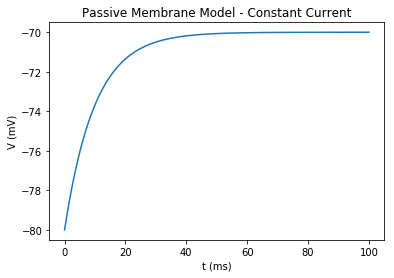

In [11]:
plt.plot(t_seq, V_t_const)
plt.title("Passive Membrane Model - Constant Current")
plt.xlabel("t (ms)")
plt.ylabel("V (mV)")

In [12]:
t_max = 50
t_seq, V_t_sin_1, voltages_sin_1 = euler_dV(dV, V_0, E, R, sin_current, I_0, 1, t_max, dt)
t_seq, V_t_sin_10, voltages_sin_10 = euler_dV(dV, V_0, E, R, sin_current, I_0, 10, t_max, dt)
t_seq, V_t_sin_30, voltages_sin_30 = euler_dV(dV, V_0, E, R, sin_current, I_0, 30, t_max, dt)

V_t = [V_t_sin_1, V_t_sin_10, V_t_sin_30]
voltages_sin = [voltages_sin_1, voltages_sin_10, voltages_sin_30]

Text(81.125,0.5,u'$V$ (mV)')

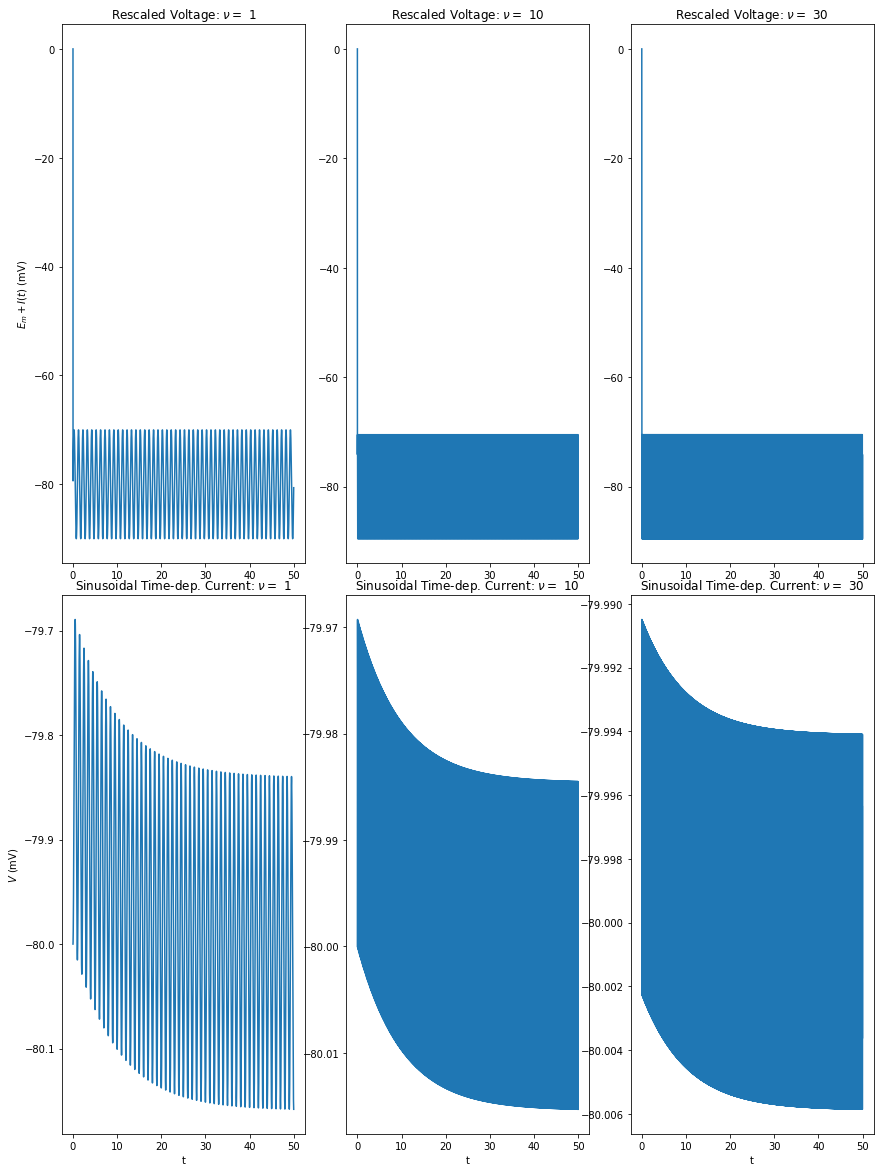

In [13]:
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 16))
#fig.tight_layout(rect=[0, 0.03, 1, 0.925])
fig.tight_layout()
vs = [1, 10, 30]

for i in range(3):
    ax[0, i].plot(t_seq, voltages_sin[i])
    ax[1, i].plot(t_seq, V_t[i])
    ax[0, i].set_title(r"Rescaled Voltage: $\nu =$ {}".format(vs[i]))
    ax[1, i].set_title(r"Sinusoidal Time-dep. Current: $\nu =$ {}".format(vs[i]))
    ax[1, i].set_xlabel("t")

ax[0, 0].set_ylabel(r"$E_m + I(t)$ (mV)")
ax[1, 0].set_ylabel(r"$V$ (mV)")

In [14]:
v_interval = np.arange(1, 100, 1)

delta_phis = []
A_nu = []

In [15]:
for v in v_interval:
    t_seq, V_t_const, voltages = euler_dV(dV, V_0, E, R, sin_current, I_0, v, t_max, dt)
    phi_max_idx = np.argmax(np.array(voltages))
    phi_max_driving_idx = np.argmax(np.array(voltages[1:]))
    delta_phi_temp = voltages[phi_max_idx] - voltages[phi_max_driving_idx]
    
    A_nu_temp = (voltages[-1] - E)/np.sin(v*phi_max_driving_idx - delta_phi_temp)
    
    delta_phis.append(delta_phi_temp)
    A_nu.append(A_nu_temp)

/Users/rtl/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars


In [16]:
def voltage_A(v, I_0, R, tau):
    return I_0*R*np.sqrt(1/(1+2*math.pi*v*tau)**2)

def phase_diff(v, tau):
    return np.arctan(2*math.pi*v*tau)

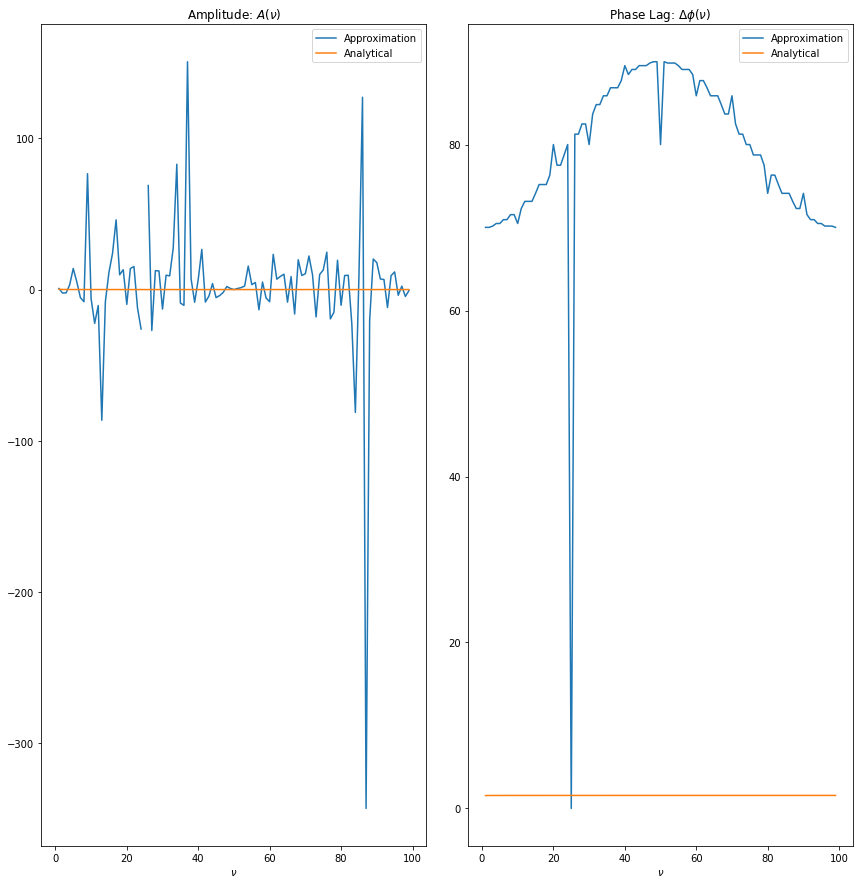

In [17]:
# Plot the results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
#fig.tight_layout(rect=[0, 0.03, 1, 0.925])
fig.tight_layout()

ax[0].plot(v_interval, A_nu, label="Approximation")
ax[0].plot(v_interval, voltage_A(v_interval, I_0, R, tau), label="Analytical")

ax[1].plot(v_interval, delta_phis, label="Approximation")
ax[1].plot(v_interval, phase_diff(v_interval, tau), label="Analytical")

ax[0].set_title(r"Amplitude: $A(\nu)$")
ax[1].set_title(r"Phase Lag: $\Delta \phi (\nu)$")
ax[0].set_xlabel(r"$\nu$")
ax[1].set_xlabel(r"$\nu$")
ax[0].legend()
ax[1].legend()

Not sure what is wanted here. Please help me! Am I supposed to simulate an Euler approx for each $\nu$ in the range 1-100, then do the $\Delta \phi (\nu)$ approximation and then infer A as $R_m I(t)/sin(\nu t -\Delta \phi)$?